# 画图：不同尾部切分

In [5]:
rouges_bi = {18:0.9596, 20:0.9663,22:0.9756
,24:0.9723,26:0.9664,28:0.9773,30:0.8740}
rouges_tag = {18:0.7411,20:0.7589,22:0.7539,24:0.7535,26:0.7585,28:0.7657
,30:0.6145}

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

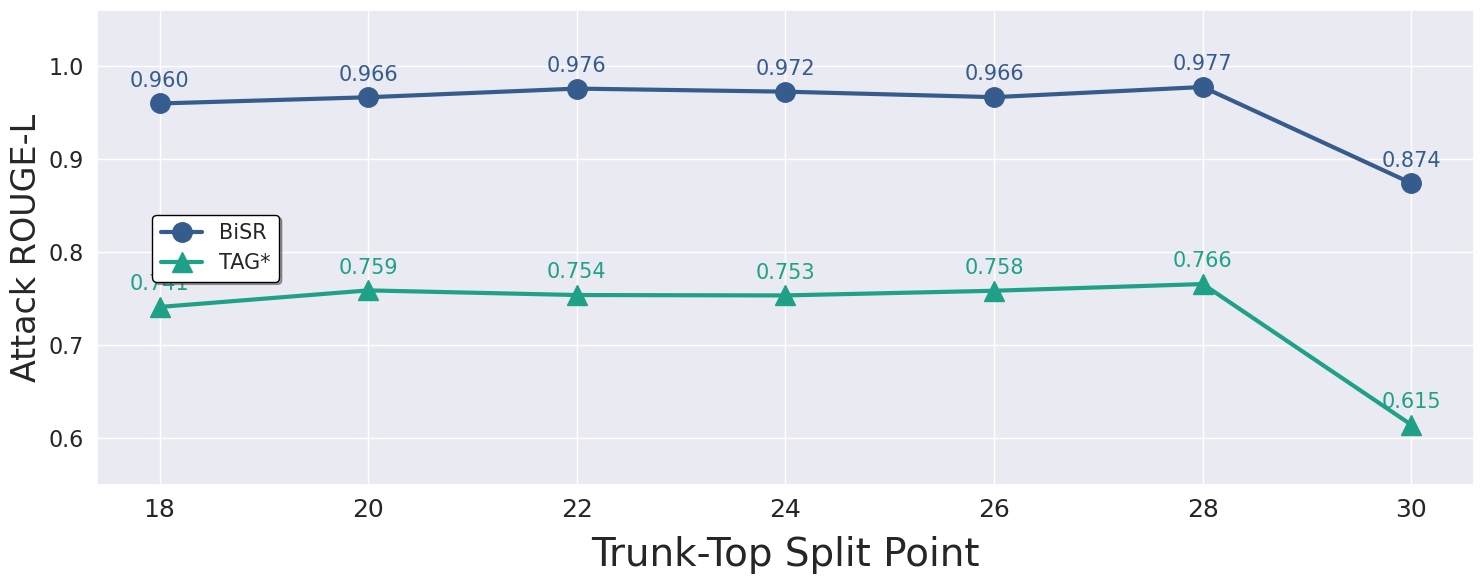

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("darkgrid")
fig, ax1 = plt.subplots(figsize=(15, 6))
# plot rouge
atk_colors = sns.color_palette("viridis", 6)
atk_colors2 = sns.color_palette('coolwarm', 6)
atk_colors3 = sns.color_palette('cool', 6)
atk_colors4 = sns.color_palette('Spectral', 6)
color_ppl = sns.color_palette("autumn", 6)[3]
all_data = { 'BiSR': rouges_bi,  'TAG*': rouges_tag}
colors = {'BiSR': atk_colors[1],  'TAG*': atk_colors[3], 'Test-PPL':color_ppl}
markers = {'BiSR': 'o', 'SIP-only': 's', 'TAG*': '^','Test-PPL':'d'}

ax1.set_ylabel('Attack ROUGE-L', fontsize=24,fontname="Times New Roman")
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=16)
# the font suitable for thesis
ax1.set_xlabel('Trunk-Top Split Point', fontsize=28, fontname="Times New Roman", labelpad=10)
ax1.set_ylim(0.55, 1.06)
# ax2 = ax1.twinx()
# ax2.set_ylabel('LLM Test-Perplexity', fontsize=24, fontname="Times New Roman", color=color_ppl)
# ax2.tick_params(axis='y', labelcolor=color_ppl, labelsize=16)
# ax2.set_ylim(21, 35)
for name, data in all_data.items():
    axis = ax1
    linestyle='-'
    # if name =='Test-PPL':
    #     axis = ax2
    #     linestyle = '--'
    axis.plot(data.keys(), data.values(), color=colors[name], marker=markers[name], markersize=14, label=name, linestyle=linestyle, linewidth=3)

    for i, (ep, rg) in enumerate(data.items()):
        ofst = 12
        if name == 'SIP-only':
            ofst = -22
        if name =='Test-PPL' and ep == 9600:
            ofst = 30
        axis.annotate(f'{rg:.3f}', (ep, rg), textcoords="offset points",
                     xytext=(0, ofst),
                     ha='center', fontsize=15, color=colors[name])


# the legend with rounded corner and white background
fig.legend(loc='lower left', bbox_to_anchor=(0.1, 0.50), ncol=1, fontsize=15, frameon=True, fancybox=True, shadow=True, framealpha=1, edgecolor='black',facecolor='white')

# ax2.yaxis.grid(False)


# save the figure
plt.tight_layout()
plt.savefig('./diff_split_dlg.pdf')